In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('data/df.csv')
df.head()


,Unnamed: 0,images,masks,collages
0,0,images/HipHop_HipHop1_C0_00180.png,masks/HipHop_HipHop1_C0_00180.png,collages/HipHop_HipHop1_C0_00180.jpg
1,1,images/HipHop_HipHop1_C0_00225.png,masks/HipHop_HipHop1_C0_00225.png,collages/HipHop_HipHop1_C0_00225.jpg
2,2,images/HipHop_HipHop1_C0_00360.png,masks/HipHop_HipHop1_C0_00360.png,collages/HipHop_HipHop1_C0_00360.jpg
3,3,images/HipHop_HipHop1_C0_00405.png,masks/HipHop_HipHop1_C0_00405.png,collages/HipHop_HipHop1_C0_00405.jpg
4,4,images/HipHop_HipHop1_C0_00450.png,masks/HipHop_HipHop1_C0_00450.png,collages/HipHop_HipHop1_C0_00450.jpg


In [3]:
def load_image_and_mask(row):
    image_path = os.path.join('data', row['images'])
    mask_path = os.path.join('data', row['masks'])

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting to RGB

    mask = cv2.imread(mask_path, 0)  # 0 used for grayscale

    return image, mask


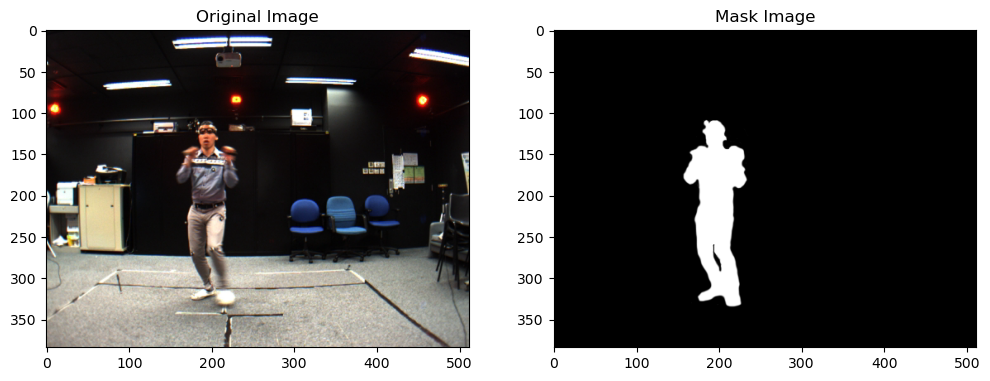

In [4]:
row = df.iloc[0]

# Load image and mask
image, mask = load_image_and_mask(row)

# Display the image and mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask Image')
plt.show()


In [60]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('data/df.csv')

def load_images(file_paths, resize_dim=(128, 128), convert_to_gray=False):
    images = []
    for fp in file_paths:
        img = cv2.imread(fp)
        if img is not None:
            if convert_to_gray:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, resize_dim, interpolation=cv2.INTER_AREA)
            images.append(img)
    images = np.array(images, dtype='float32') / 255.0
    if convert_to_gray:
        images = images.reshape(images.shape[0], resize_dim[0], resize_dim[1], 1)  # Add channel dimension for grayscale
    return images

# Correctly construct file paths
image_paths = df['images'].apply(lambda x: 'data/' + x).tolist()
mask_paths = df['masks'].apply(lambda x: 'data/' + x).tolist()

# Load and preprocess images and masks
images = load_images(image_paths)
masks = load_images(mask_paths, convert_to_gray=True)
if images is None or masks is None:
    print("Failed to load images or masks.")
else:
    # Split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate


In [63]:
def unet_model(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Middle
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(conv3)
    conv4 = Conv2D(128, 2, activation='relu', padding='same')(up1)
    merged1 = concatenate([conv2, conv4], axis=3)
    conv5 = Conv2D(128, 3, activation='relu', padding='same')(merged1)

    up2 = UpSampling2D(size=(2, 2))(conv5)
    conv6 = Conv2D(64, 2, activation='relu', padding='same')(up2)
    merged2 = concatenate([conv1, conv6], axis=3)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(merged2)

    # Output layer
    output = Conv2D(1, 1, activation='sigmoid')(conv7)

    model = Model(inputs=inputs, outputs=output)

    return model



In [64]:
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# #Save the model
# model.save('unet_image_segmentation_model.h5')


In [65]:
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_35 (Conv2D)             (None, 128, 128, 64  1792        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 64, 64, 64)  0           ['conv2d_35[0][0]']              
 )                                                                                          

In [66]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)


Epoch 1/20
27/27 [==============================] - 57s 2s/step - loss: 0.2580 - accuracy: 0.9420 - val_loss: 0.1320 - val_accuracy: 0.9497
Epoch 2/20
27/27 [==============================] - 54s 2s/step - loss: 0.1185 - accuracy: 0.9453 - val_loss: 0.0868 - val_accuracy: 0.9497
Epoch 3/20
27/27 [==============================] - 52s 2s/step - loss: 0.0776 - accuracy: 0.9453 - val_loss: 0.0651 - val_accuracy: 0.9497
Epoch 4/20
27/27 [==============================] - 52s 2s/step - loss: 0.0641 - accuracy: 0.9453 - val_loss: 0.0596 - val_accuracy: 0.9497
Epoch 5/20
27/27 [==============================] - 58s 2s/step - loss: 0.0552 - accuracy: 0.9453 - val_loss: 0.0511 - val_accuracy: 0.9497
Epoch 6/20
27/27 [==============================] - 52s 2s/step - loss: 0.0489 - accuracy: 0.9545 - val_loss: 0.0455 - val_accuracy: 0.9697
Epoch 7/20
27/27 [==============================] - 52s 2s/step - loss: 0.0469 - accuracy: 0.9667 - val_loss: 0.0416 - val_accuracy: 0.9705
Epoch 8/20
27/27 [==

8/8 [==============================] - 4s 529ms/step


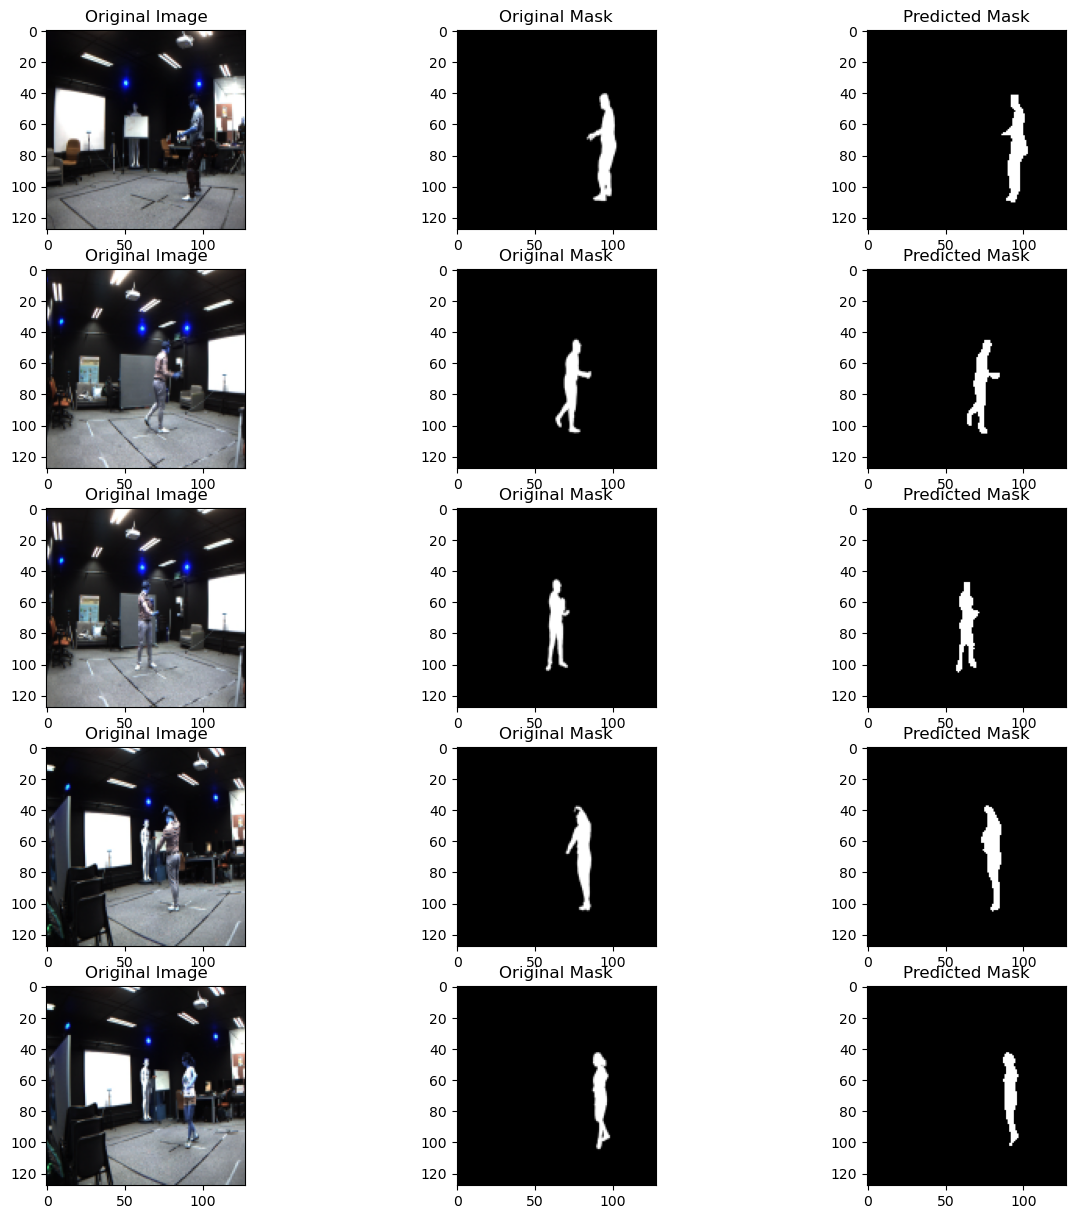

In [68]:
model.evaluate(X_test, y_test)
predictions = model.predict(X_test)

predictions = (predictions > 0.5).astype(np.uint8)

# Display the first 5 images and their predicted masks
plt.figure(figsize=(15, 15))

for i in range(5):
    plt.subplot(5, 3, 3 * i + 1)
    plt.imshow(X_test[i])
    plt.title('Original Image')
    plt.subplot(5, 3, 3 * i + 2)
    plt.imshow(y_test[i].reshape(128, 128), cmap='gray')
    plt.title('Original Mask')
    plt.subplot(5, 3, 3 * i + 3)
    plt.imshow(predictions[i].reshape(128, 128), cmap='gray')
    plt.title('Predicted Mask')


